In [1]:
import pandas as pd

In [3]:
#ruta al archivo CSV
data_latinoamerica = '/Users/eric/Documents/PYTHON/M4 PI FILES/data_latinoamerica.csv'

#leer el archivo CSV
df_latinoamerica = pd.read_csv(data_latinoamerica)

#mostrar las primeras filas del dataframe para verificar su contenido
print(df_latinoamerica.head())

  location_key        date country_code country_name  new_confirmed  \
0           AR  2020-01-01           AR    Argentina            3.0   
1           AR  2020-01-02           AR    Argentina           14.0   
2           AR  2020-01-03           AR    Argentina            3.0   
3           AR  2020-01-04           AR    Argentina            7.0   
4           AR  2020-01-05           AR    Argentina            5.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0           0.0                   3.0                  0.0   
1           0.0                  17.0                  0.0   
2           0.0                  20.0                  0.0   
3           0.0                  27.0                  0.0   
4           0.0                  32.0                  0.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                    NaN  44938712.0  ...   
1                                    NaN  44938712.0  ...   
2                

In [6]:
#Establecer los paises seleccionados
paises_objetivo = ['Colombia', 'Argentina', 'Chile', 'Mexico', 'Peru', 'Brasil']

#filtrado
df_filtrado = df_latinoamerica[df_latinoamerica['country_name'].isin(paises_objetivo)].copy()

#verificar resultado
print(df_filtrado['country_name'].value_counts())
print(f"Filas luego del filtro por país: {df_filtrado.shape[0]}")



country_name
Mexico       2475518
Peru         1883891
Colombia     1145596
Argentina     540095
Chile         359733
Name: count, dtype: int64
Filas luego del filtro por país: 6404833


In [8]:
df_filtrado['date'] = pd.to_datetime(df_filtrado['date'], errors='coerce')

In [9]:
df_filtrado = df_filtrado[df_filtrado['date']> '2021-01-01'].copy()

In [10]:
print(f"Filas Luego del filtro por fecha: {df_filtrado.shape[0]}")
print(f"Rango de fechas: {df_filtrado['date'].min().date()} a {df_filtrado['date'].max().date()}")

Filas Luego del filtro por fecha: 4032912
Rango de fechas: 2021-01-02 a 2022-09-17


In [11]:
#porcentaje de valor nulos por columna 
porcentaje_nulos = df_filtrado.isnull().mean().sort_values(ascending=False)
print(porcentaje_nulos[porcentaje_nulos > 0])

gdp_usd                                  0.999226
gdp_per_capita_usd                       0.999226
diabetes_prevalence                      0.999226
infant_mortality_rate                    0.999226
population_density                       0.999226
population_urban                         0.999226
population_rural                         0.999226
nurses_per_1000                          0.999226
physicians_per_1000                      0.999226
population_largest_city                  0.999226
area_rural_sq_km                         0.999226
area_urban_sq_km                         0.999226
life_expectancy                          0.999226
adult_male_mortality_rate                0.999226
adult_female_mortality_rate              0.999226
pollution_mortality_rate                 0.999226
comorbidity_mortality_rate               0.999226
smoking_prevalence                       0.999226
human_development_index                  0.998453
cumulative_recovered                     0.943950


In [13]:
#Paso 1: Ordenar por pais y fecha (importante para el llenado hacia adelante y atras)
df_filtrado.sort_values(['country_name', 'date'], inplace=True)

#Paso 2: Seleccionar solo columnas númericas
columnas_numericas = df_filtrado.select_dtypes(include=['float64', 'int64']).columns

#Paso 3: Llenar los valores nulos en cada columna numerica por pais (ffill y luego bfill)
for col in columnas_numericas:
    df_filtrado[col] = df_filtrado.groupby('country_name')[col].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

/var/folders/85/4zhdkjw164d3851rbf4mvshh0000gn/T/ipykernel_67367/2891726977.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtrado[col] = df_filtrado.groupby('country_name')[col].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
/var/folders/85/4zhdkjw164d3851rbf4mvshh0000gn/T/ipykernel_67367/2891726977.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtrado[col] = df_filtrado.groupby('country_name')[col].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
/var/folders/85/4zhdkjw164d3851rbf4mvshh0000gn/T/ipykernel_67367/2891726977.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtrado[col] = df_filtrado.groupby('country_name')[col].transform(lambda x: x.fillna(me

In [14]:
# Mostrar las 10 columnas con más valores nulos (debería ser 0 si todo fue bien)
print(df_filtrado.isnull().sum().sort_values(ascending=False).head(10))

cumulative_recovered           3311568
new_recovered                  3085056
maximum_temperature_celsius          0
latitude                             0
longitude                            0
area_sq_km                           0
smoking_prevalence                   0
diabetes_prevalence                  0
infant_mortality_rate                0
nurses_per_1000                      0
dtype: int64


In [16]:
df_filtrado.dropna(axis=1, how='all', inplace=True)

In [17]:
print(df_filtrado.isnull().mean().sort_values(ascending=False).head(10))

cumulative_recovered           0.821136
new_recovered                  0.764970
maximum_temperature_celsius    0.000000
latitude                       0.000000
longitude                      0.000000
area_sq_km                     0.000000
smoking_prevalence             0.000000
diabetes_prevalence            0.000000
infant_mortality_rate          0.000000
nurses_per_1000                0.000000
dtype: float64


In [18]:
# Rellenar con 0 (si interpretamos que "no hay datos" = "no hubo nuevos casos recuperados ese día")
df_filtrado['new_recovered'] = df_filtrado['new_recovered'].fillna(0)
df_filtrado['cumulative_recovered'] = df_filtrado['cumulative_recovered'].fillna(method='ffill')

/var/folders/85/4zhdkjw164d3851rbf4mvshh0000gn/T/ipykernel_67367/3427419023.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtrado['cumulative_recovered'] = df_filtrado['cumulative_recovered'].fillna(method='ffill')


In [19]:
# Forzar numérico donde haya strings numéricos
for col in df_filtrado.columns:
    if df_filtrado[col].dtype == 'object':
        try:
            df_filtrado[col] = pd.to_numeric(df_filtrado[col])
        except:
            pass

In [20]:
df_filtrado.describe().T

,count,mean,min,25%,50%,75%,max,std
date,4032912,2021-11-09 12:00:00.000001024,2021-01-02 00:00:00,2021-06-06 18:00:00,2021-11-09 12:00:00,2022-04-14 06:00:00,2022-09-17 00:00:00,NaN
new_confirmed,4032912.0,2205.79815,-101.0,1.0,10.0,2242.0,174174.0,4693.104934
new_deceased,4032912.0,103.045721,-53.0,0.0,0.0,80.0,11447.0,243.454539
cumulative_confirmed,4032912.0,1608288.420012,0.0,658.0,20365.0,3517260.0,9697763.0,2172663.582858
cumulative_deceased,4032912.0,90233.994415,0.0,22.0,538.0,212979.0,304025.0,111674.861406
cumulative_vaccine_doses_administered,4032912.0,65457074.087924,0.0,2040962.0,50067903.0,87566541.0,209673612.0,68081155.426642
population,4032912.0,121850.491258,4.0,3682.0,12058.0,34126.0,110991953.0,1739159.141903
population_male,4032912.0,223608.15581,12.0,1985.0,7326.0,51674.0,54855231.0,942283.95047
population_female,4032912.0,232451.547733,29.0,2023.0,7548.0,51873.0,57481307.0,984950.594702
population_rural,4032912.0,13873555.934396,2341903.0,7120114.0,9512141.0,24948670.0,24948670.0,8977560.426767


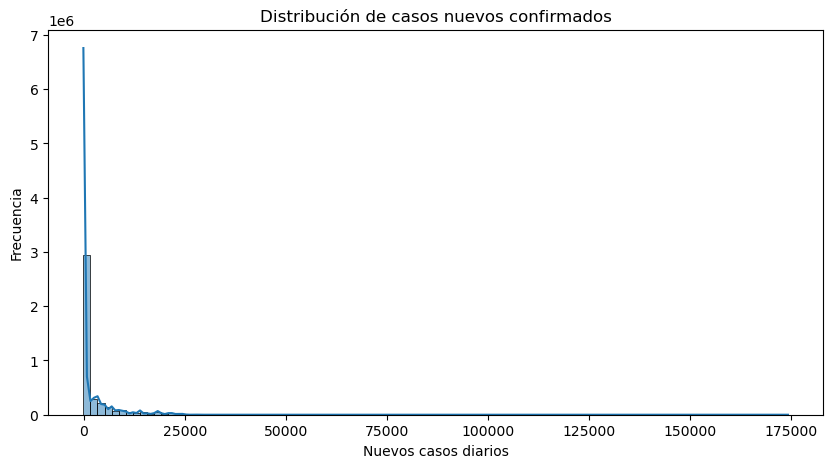

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(df_filtrado['new_confirmed'], bins=100, kde=True)
plt.title('Distribución de casos nuevos confirmados')
plt.xlabel('Nuevos casos diarios')
plt.ylabel('Frecuencia')
plt.show()

In [22]:
print(df_filtrado.columns.tolist())

['location_key', 'date', 'country_code', 'country_name', 'new_confirmed', 'new_deceased', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered', 'population', 'population_male', 'population_female', 'population_rural', 'population_urban', 'population_density', 'human_development_index', 'population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd', 'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence', 'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000', 'physicians_per_1000', 'average_temperature_celsius', 'minimum_temperature_celsius', 'maximum_temperature_celsius', 'rainfall_mm', 'relative_humidity', 'population_largest_city', 'area_rural_sq_km', 'area_urban_sq_km', 'life_expectancy', 'adult_male_mortality_rate', 'adult_female_mortality_rate

In [23]:
df_filtrado.to_csv('/Users/eric/Documents/PYTHON/M4 PI FILES/DatosFinalesFiltrado.csv', index=False)
print("Archivo guardado exitosamente.")

Archivo guardado exitosamente.


In [24]:
variables = [
    'new_confirmed',
    'new_deceased',
    'cumulative_confirmed',
    'cumulative_deceased',
    'cumulative_vaccine_doses_administered',
    'population',
    'population_density',
    'diabetes_prevalence',
    'life_expectancy',
    'nurses_per_1000',
    'gdp_per_capita_usd'
]

In [25]:
for var in variables:
    print(f"--- {var} ---")
    print(f"Media: {df_filtrado[var].mean():,.2f}")
    print(f"Mediana: {df_filtrado[var].median():,.2f}")
    print(f"Varianza: {df_filtrado[var].var():,.2f}")
    print(f"Desviación estándar: {df_filtrado[var].std():,.2f}")
    print(f"Valor mínimo: {df_filtrado[var].min():,.2f}")
    print(f"Valor máximo: {df_filtrado[var].max():,.2f}")
    print("\n")

--- new_confirmed ---
Media: 2,205.80
Mediana: 10.00
Varianza: 22,025,233.92
Desviación estándar: 4,693.10
Valor mínimo: -101.00
Valor máximo: 174,174.00


--- new_deceased ---
Media: 103.05
Mediana: 0.00
Varianza: 59,270.11
Desviación estándar: 243.45
Valor mínimo: -53.00
Valor máximo: 11,447.00


--- cumulative_confirmed ---
Media: 1,608,288.42
Mediana: 20,365.00
Varianza: 4,720,467,044,278.20
Desviación estándar: 2,172,663.58
Valor mínimo: 0.00
Valor máximo: 9,697,763.00


--- cumulative_deceased ---
Media: 90,233.99
Mediana: 538.00
Varianza: 12,471,274,670.12
Desviación estándar: 111,674.86
Valor mínimo: 0.00
Valor máximo: 304,025.00


--- cumulative_vaccine_doses_administered ---
Media: 65,457,074.09
Mediana: 50,067,903.00
Varianza: 4,635,043,724,226,567.00
Desviación estándar: 68,081,155.43
Valor mínimo: 0.00
Valor máximo: 209,673,612.00


--- population ---
Media: 121,850.49
Mediana: 12,058.00
Varianza: 3,024,674,520,864.67
Desviación estándar: 1,739,159.14
Valor mínimo: 4.00
Va

Tras aplicar medidas estadísticas a las variables seleccionadas, se destacan los siguientes puntos:
	•	Incidencia promedio diaria (new_confirmed) muestra una alta variabilidad, con una media significativamente inferior al valor máximo, lo que indica días con picos muy altos.
	•	Nuevos fallecidos diarios (new_deceased) presenta un comportamiento similar, con valores extremos que reflejan eventos críticos en algunos países.
	•	Dosis de vacunas administradas (cumulative_vaccine_doses_administered) presenta valores muy dispersos, reflejo de políticas sanitarias distintas y disponibilidad desigual entre países.
	•	Variables demográficas como population_density y life_expectancy presentan menos dispersión, pero revelan diferencias importantes entre países urbanos como México y más rurales como Perú.
	•	Factores sanitarios como nurses_per_1000 y diabetes_prevalence ayudan a contextualizar la capacidad de respuesta ante la pandemia y posibles factores de riesgo.
	•	Económicamente, países con mayor gdp_per_capita_usd suelen tener también mejor infraestructura médica, aunque no necesariamente mejores resultados sanitarios, lo que invita a un análisis más profundo.

In [26]:
def analizar_variable(serie):
    mediana = serie.median()
    varianza = serie.var()
    rango = serie.max() - serie.min()

    print(f"Mediana: {mediana:,.2f}")
    print(f"Varianza: {varianza:,.2f}")
    print(f"Rango: {rango:,.2f}")

In [27]:
print("Análisis de 'new_confirmed':")
analizar_variable(df_filtrado['new_confirmed'])

Análisis de 'new_confirmed':
Mediana: 10.00
Varianza: 22,025,233.92
Rango: 174,275.00


¿Qué representa la mediana?

La mediana representa el valor central de una distribución, útil cuando hay valores extremos que distorsionan la media. Por ejemplo, en casos diarios de COVID-19, la mediana puede mostrar que la mayoría de los días tuvieron menos casos que la media general.

¿Cómo varía la dispersión?

La varianza y el rango muestran cuán dispersos están los datos. Si la varianza es alta, hay gran diferencia entre los valores, lo que puede indicar inestabilidad o desigualdad en el comportamiento del fenómeno analizado.

¿Qué nos dice esto sobre consistencia o variabilidad?

Un rango muy amplio o una varianza alta indica alta variabilidad en los datos, lo cual es importante al evaluar riesgos o planificar intervenciones. La mediana, al ser menos sensible a los extremos, puede ayudar a entender mejor el comportamiento típico.

#Avance 2 – Análisis Estadístico y Visualización de Datos

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
ruta = '/Users/eric/Documents/PYTHON/M4 PI FILES/DatosFinalesFiltrado.csv'
df = pd.read_csv(ruta)

In [30]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [31]:
columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns

In [32]:
# Descripción general de todas las variables numéricas
estadisticas_generales = df[columnas_numericas].describe().T
estadisticas_generales

,count,mean,std,min,25%,50%,75%,max
new_confirmed,4032912.0,2.205798e+03,4.693105e+03,-1.010000e+02,1.000000e+00,1.000000e+01,2.242000e+03,1.741740e+05
new_deceased,4032912.0,1.030457e+02,2.434545e+02,-5.300000e+01,0.000000e+00,0.000000e+00,8.000000e+01,1.144700e+04
cumulative_confirmed,4032912.0,1.608288e+06,2.172664e+06,0.000000e+00,6.580000e+02,2.036500e+04,3.517260e+06,9.697763e+06
cumulative_deceased,4032912.0,9.023399e+04,1.116749e+05,0.000000e+00,2.200000e+01,5.380000e+02,2.129790e+05,3.040250e+05
cumulative_vaccine_doses_administered,4032912.0,6.545707e+07,6.808116e+07,0.000000e+00,2.040962e+06,5.006790e+07,8.756654e+07,2.096736e+08
population,4032912.0,1.218505e+05,1.739159e+06,4.000000e+00,3.682000e+03,1.205800e+04,3.412600e+04,1.109920e+08
population_male,4032912.0,2.236082e+05,9.422840e+05,1.200000e+01,1.985000e+03,7.326000e+03,5.167400e+04,5.485523e+07
population_female,4032912.0,2.324515e+05,9.849506e+05,2.900000e+01,2.023000e+03,7.548000e+03,5.187300e+04,5.748131e+07
population_rural,4032912.0,1.387356e+07,8.977560e+06,2.341903e+06,7.120114e+06,9.512141e+06,2.494867e+07,2.494867e+07
population_urban,4032912.0,5.885577e+07,3.541432e+07,1.661014e+07,2.539034e+07,4.082730e+07,1.026269e+08,1.026269e+08


In [33]:
matriz_corr = df[columnas_numericas].corr()
matriz_corr.round(2)

,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,population_male,population_female,population_rural,population_urban,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
new_confirmed,1.00,0.69,0.37,0.55,-0.04,0.03,-0.02,-0.02,0.31,0.31,...,0.30,0.14,0.29,-0.27,0.29,0.28,-0.08,0.16,0.02,0.00
new_deceased,0.69,1.00,0.22,0.50,-0.15,0.01,-0.05,-0.05,0.46,0.46,...,0.45,0.21,0.44,-0.37,0.42,0.38,-0.16,0.26,0.00,-0.01
cumulative_confirmed,0.37,0.22,1.00,0.75,0.13,0.03,0.08,0.08,0.06,0.07,...,0.06,0.04,0.07,-0.09,0.11,0.07,-0.04,0.16,-0.00,-0.01
cumulative_deceased,0.55,0.50,0.75,1.00,0.05,0.01,-0.05,-0.05,0.40,0.37,...,0.37,0.14,0.35,-0.38,0.40,0.40,0.00,0.16,-0.01,-0.02
cumulative_vaccine_doses_administered,-0.04,-0.15,0.13,0.05,1.00,0.00,-0.08,-0.08,0.57,0.55,...,0.53,0.22,0.53,-0.45,0.51,0.47,-0.17,0.28,-0.02,-0.03
population,0.03,0.01,0.03,0.01,0.00,1.00,0.89,0.89,0.00,0.01,...,0.01,0.02,0.01,0.00,0.00,-0.00,-0.03,0.03,0.21,0.30
population_male,-0.02,-0.05,0.08,-0.05,-0.08,0.89,1.00,1.00,-0.08,-0.08,...,-0.13,-0.15,-0.08,0.12,-0.06,-0.15,-0.11,0.16,0.20,0.28
population_female,-0.02,-0.05,0.08,-0.05,-0.08,0.89,1.00,1.00,-0.08,-0.08,...,-0.13,-0.14,-0.08,0.12,-0.06,-0.15,-0.10,0.16,0.20,0.28
population_rural,0.31,0.46,0.06,0.40,0.57,0.00,-0.08,-0.08,1.00,0.98,...,0.93,0.38,0.94,-0.82,0.95,0.85,-0.31,0.60,-0.01,-0.03
population_urban,0.31,0.46,0.07,0.37,0.55,0.01,-0.08,-0.08,0.98,1.00,...,0.98,0.54,0.99,-0.81,0.94,0.81,-0.46,0.71,-0.01,-0.02


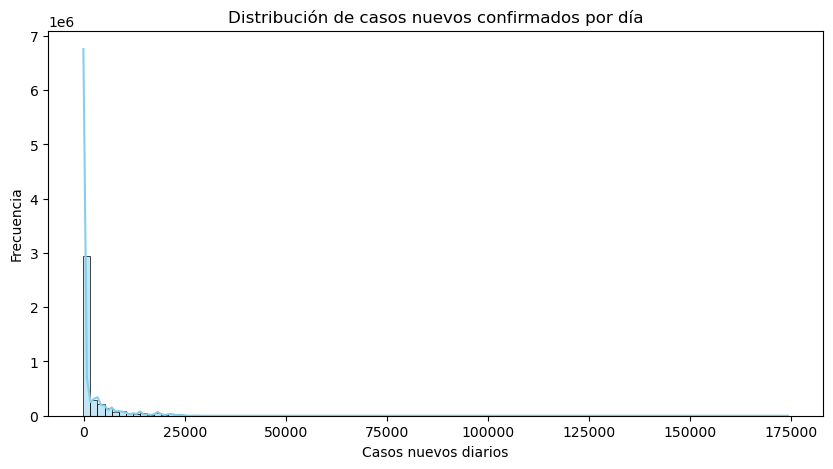

In [35]:
#Histograma + Grafico de densidad: indicencia de COVID-19
plt.figure(figsize=(10, 5))
sns.histplot(df['new_confirmed'], bins=100, kde=True, color='skyblue')
plt.title('Distribución de casos nuevos confirmados por día')
plt.xlabel('Casos nuevos diarios')
plt.ylabel('Frecuencia')
plt.show()

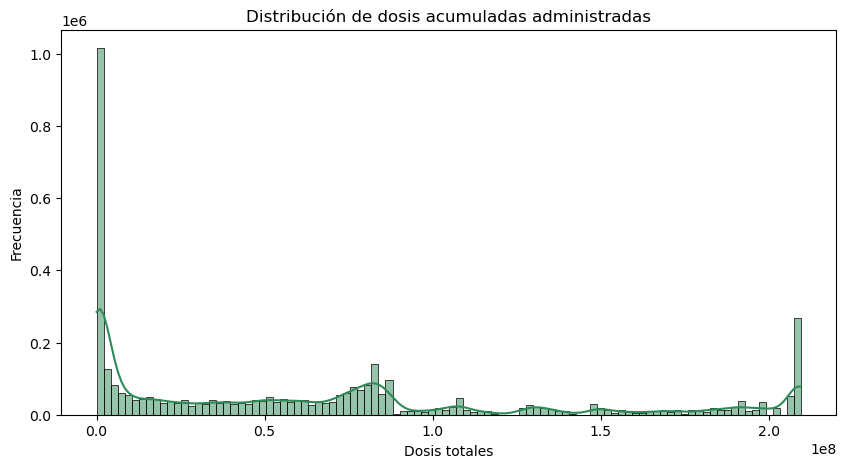

In [36]:
#Histograma: Tasas de vacunación
plt.figure(figsize=(10, 5))
sns.histplot(df['cumulative_vaccine_doses_administered'], bins=100, kde=True, color='seagreen')
plt.title('Distribución de dosis acumuladas administradas')
plt.xlabel('Dosis totales')
plt.ylabel('Frecuencia')
plt.show()

/var/folders/85/4zhdkjw164d3851rbf4mvshh0000gn/T/ipykernel_67367/3025863728.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=casos_promedio.index, y=casos_promedio.values, palette='viridis')


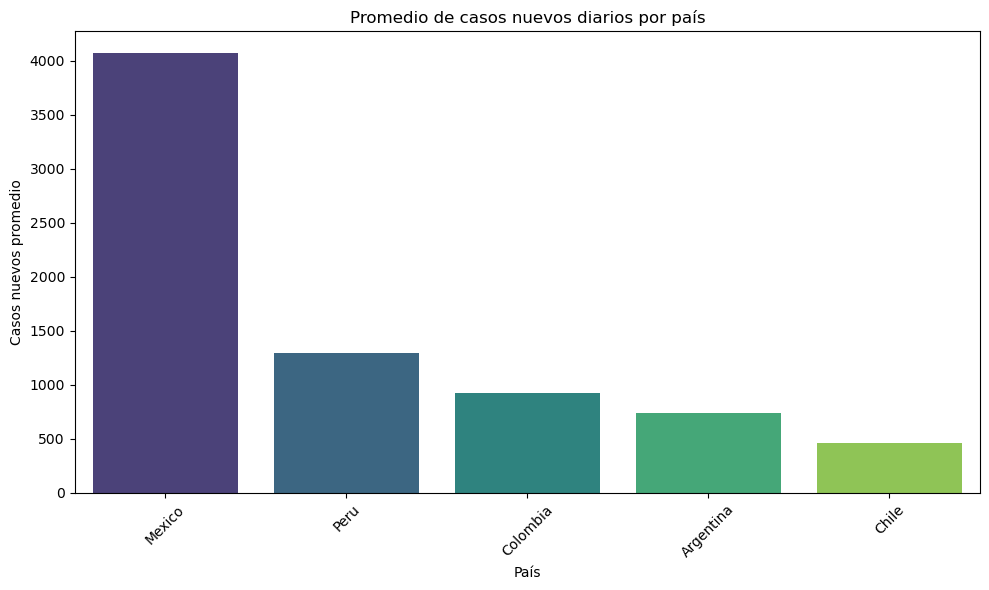

In [37]:
#Grafico de barras: Casos nuevos promedio por país
# Agrupar y calcular promedio de casos nuevos
casos_promedio = df.groupby('country_name')['new_confirmed'].mean().sort_values(ascending=False)

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=casos_promedio.index, y=casos_promedio.values, palette='viridis')

plt.title('Promedio de casos nuevos diarios por país')
plt.xlabel('País')
plt.ylabel('Casos nuevos promedio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

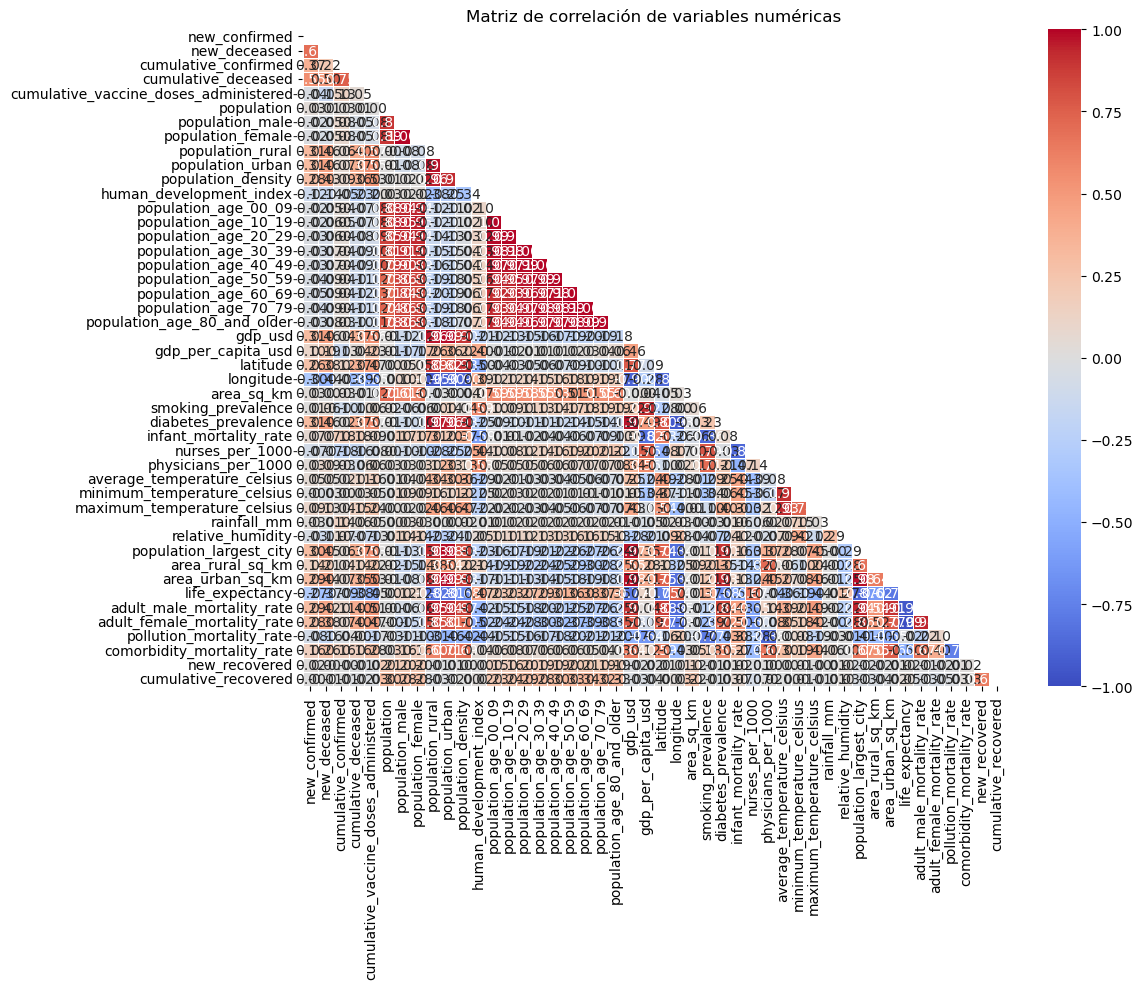

In [38]:
#Mapa de calor: Matriz de correlación
# Calcular matriz de correlación
matriz_corr = df.select_dtypes(include=['float64', 'int64']).corr()

# Crear máscara para triángulo superior
mask = np.triu(np.ones_like(matriz_corr, dtype=bool))

# Dibujar el heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5, vmin=-1, vmax=1)
plt.title('Matriz de correlación de variables numéricas')
plt.tight_layout()
plt.show()

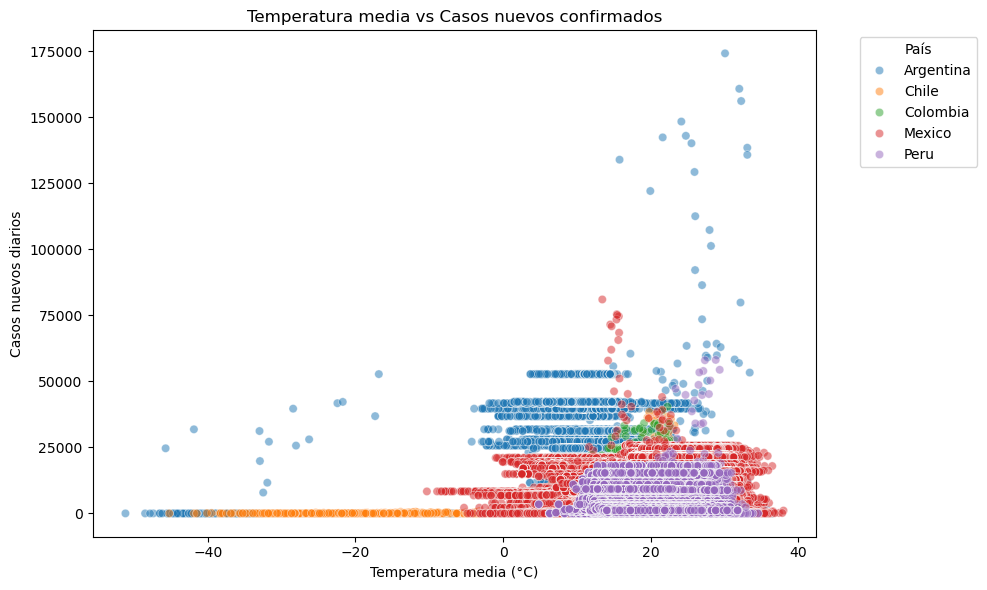

In [39]:
#Grafico de dispersión: Temperatura media vs casos confirmados
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='average_temperature_celsius', y='new_confirmed', hue='country_name', alpha=0.5)
plt.title('Temperatura media vs Casos nuevos confirmados')
plt.xlabel('Temperatura media (°C)')
plt.ylabel('Casos nuevos diarios')
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

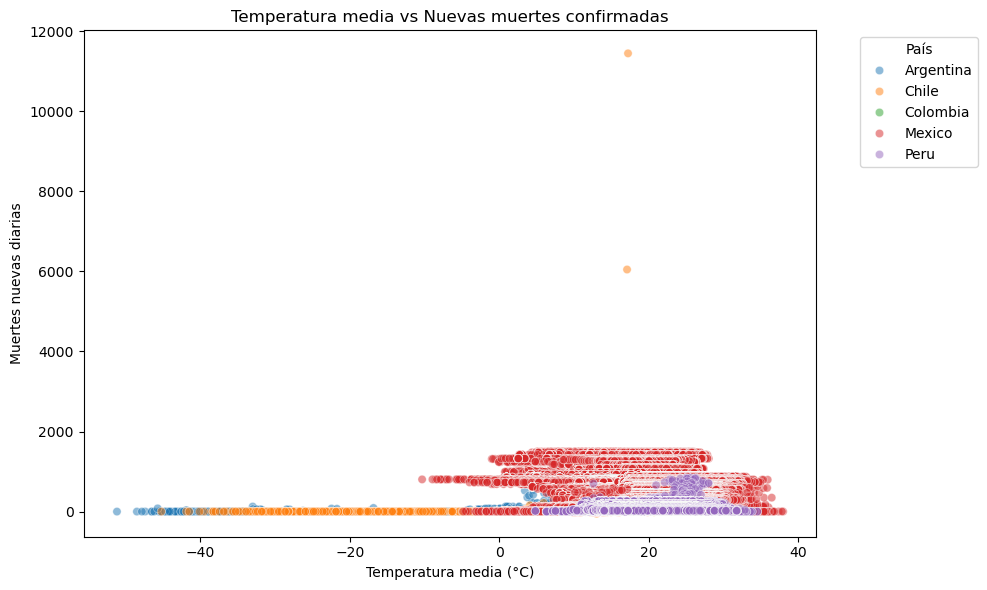

In [40]:
#Temperatura media vs muertes nuevas confirmadas
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='average_temperature_celsius', y='new_deceased', hue='country_name', alpha=0.5)
plt.title('Temperatura media vs Nuevas muertes confirmadas')
plt.xlabel('Temperatura media (°C)')
plt.ylabel('Muertes nuevas diarias')
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [42]:
evolucion_vacunas['mes'] = evolucion_vacunas['mes'].astype(str)

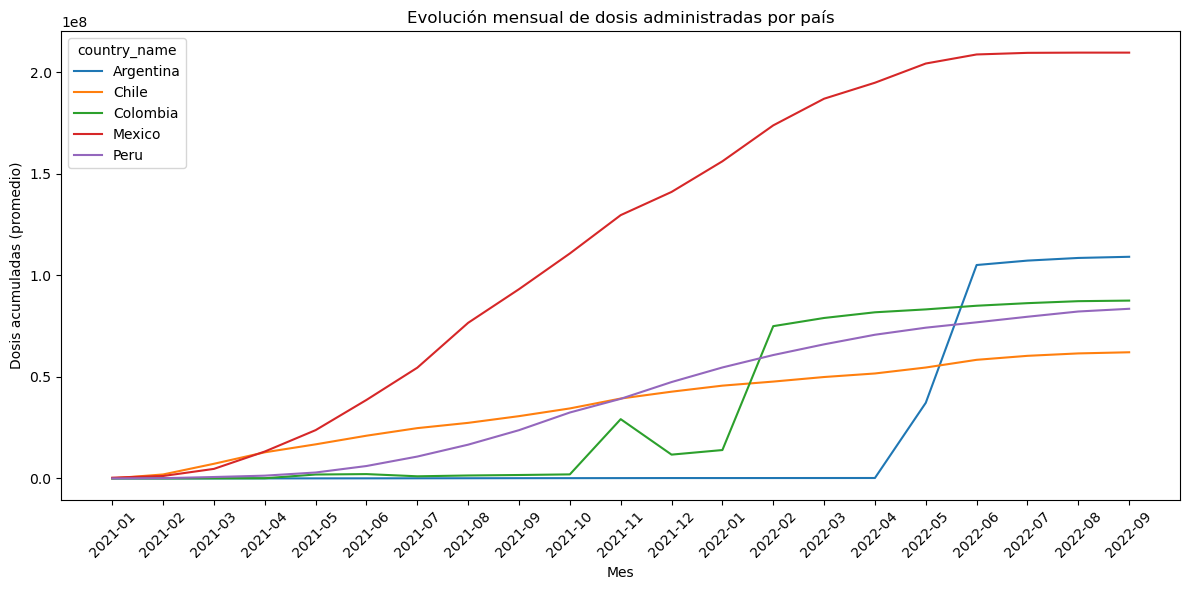

In [43]:
#Evolución mensual de dosis administradas por pais (linea)
# Crear columna de mes (si no lo hiciste ya)
df['mes'] = df['date'].dt.to_period('M')

# Agrupar por país y mes
evolucion_vacunas = df.groupby(['country_name', 'mes'])['cumulative_vaccine_doses_administered'].mean().reset_index()

# Convertir 'mes' a string o timestamp
evolucion_vacunas['mes'] = evolucion_vacunas['mes'].astype(str)  # o .dt.to_timestamp()

# Graficar
plt.figure(figsize=(12, 6))
sns.lineplot(data=evolucion_vacunas, x='mes', y='cumulative_vaccine_doses_administered', hue='country_name')
plt.title('Evolución mensual de dosis administradas por país')
plt.xlabel('Mes')
plt.ylabel('Dosis acumuladas (promedio)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/85/4zhdkjw164d3851rbf4mvshh0000gn/T/ipykernel_67367/65610519.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='country_name', y='average_temperature_celsius', palette='Set2')


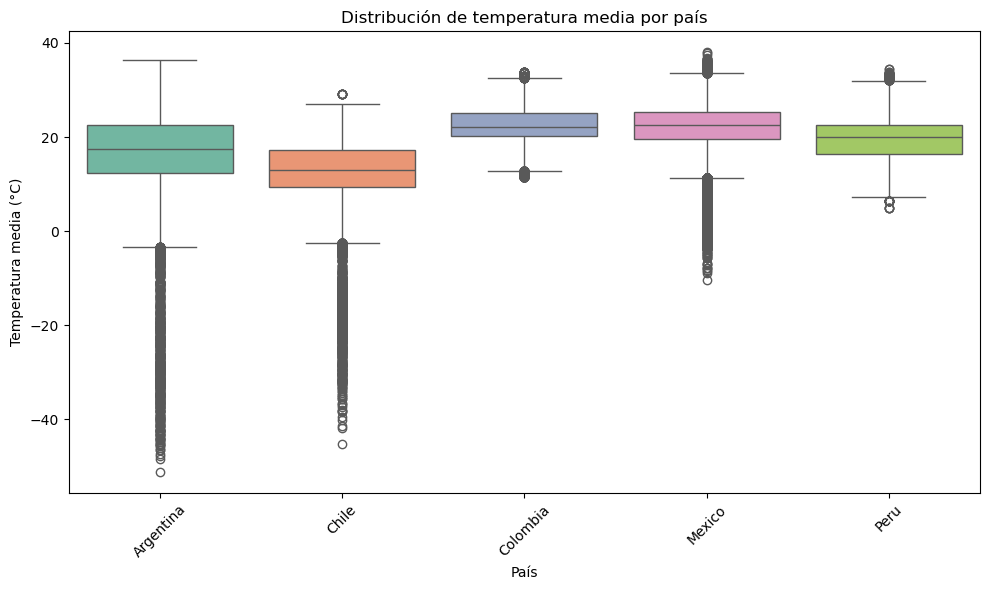

In [44]:
#Boxplot de temperatura media por pais
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='country_name', y='average_temperature_celsius', palette='Set2')
plt.title('Distribución de temperatura media por país')
plt.xlabel('País')
plt.ylabel('Temperatura media (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Identificación de Tendencias y Patrones

Al analizar la evolución de los casos nuevos confirmados por país, se observa una alta variabilidad diaria con picos irregulares, lo que sugiere olas de contagio en distintos momentos del año. Esta tendencia sugiere eventos de propagación rápida posiblemente relacionados con temporadas festivas, movilidad o medidas sanitarias.

En cuanto a las muertes confirmadas, la mayoría de los países presenta una correlación visible con el comportamiento de los contagios, aunque en algunos casos el desfase temporal entre ambos es notorio.

El análisis de temperatura media contra casos y muertes muestra una posible relación negativa leve en ciertos países, indicando que temperaturas más bajas podrían coincidir con aumentos de contagios, aunque no se puede establecer una relación causal directa sin mayor estudio.

Las dosis acumuladas administradas por país presentan un crecimiento sostenido, pero a distinto ritmo según el país. Esto refleja tanto la disponibilidad de vacunas como la capacidad logística de cada sistema de salud.

Además, el comportamiento mensual de las vacunas muestra avances importantes en campañas de vacunación, con aumentos notorios en ciertos meses (como mediados de 2021), lo que puede asociarse con mayores esfuerzos de cobertura o llegada de dosis a gran escala.

Estas observaciones permiten identificar áreas con necesidades críticas y comprender los factores que podrían influir en el control de la pandemia, aportando valor al momento de priorizar decisiones y recursos.

/var/folders/85/4zhdkjw164d3851rbf4mvshh0000gn/T/ipykernel_67367/924928538.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=casos_promedio.index, y=casos_promedio.values, palette='Set2')


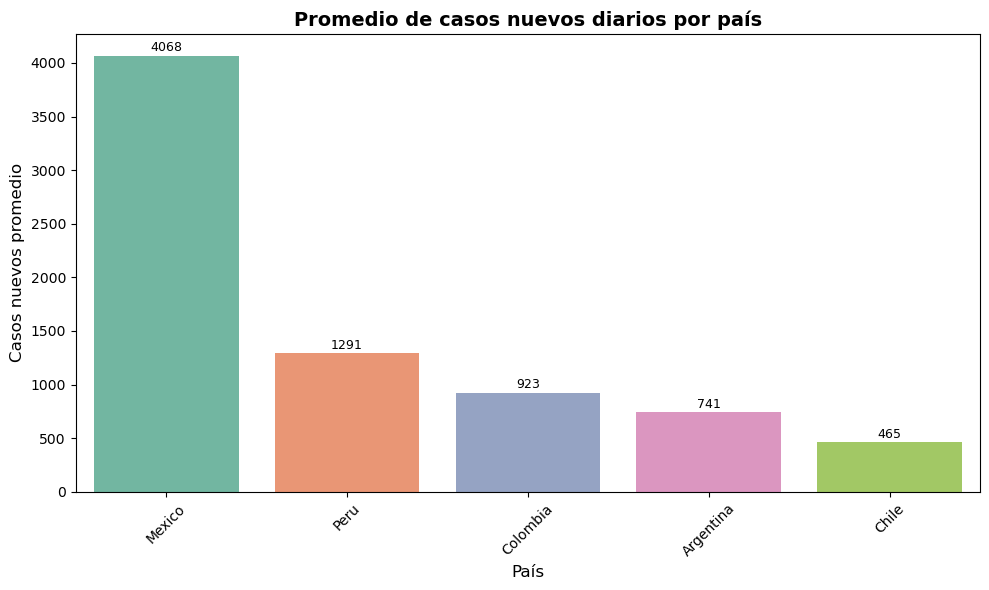

In [46]:
# Agrupar y calcular promedio de casos nuevos
casos_promedio = df.groupby('country_name')['new_confirmed'].mean().sort_values(ascending=False)

# Gráfico de barras personalizado
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=casos_promedio.index, y=casos_promedio.values, palette='Set2')

plt.title('Promedio de casos nuevos diarios por país', fontsize=14, fontweight='bold')
plt.xlabel('País', fontsize=12)
plt.ylabel('Casos nuevos promedio', fontsize=12)
plt.xticks(rotation=45)

# Añadir etiquetas a las barras
for i, v in enumerate(casos_promedio.values):
    ax.text(i, v + max(casos_promedio.values)*0.01, f'{v:.0f}', ha='center', fontsize=9)

plt.tight_layout()
# plt.savefig('grafico_casos_promedio.png', dpi=300)
plt.show()

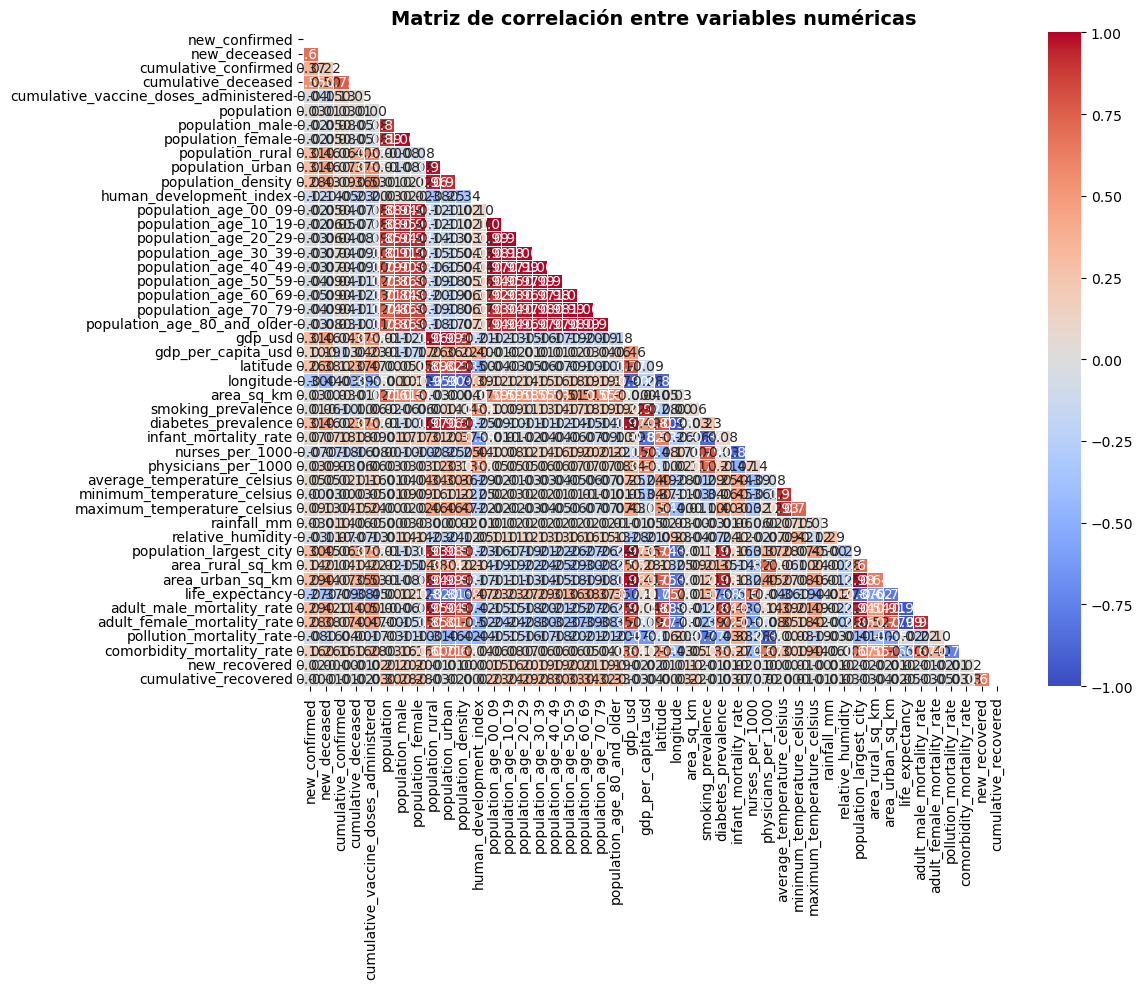

In [47]:
# Correlación + máscara
corr = df.select_dtypes(include=['float64', 'int64']).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)

plt.title('Matriz de correlación entre variables numéricas', fontsize=14, fontweight='bold')
plt.tight_layout()
# plt.savefig('mapa_calor_correlacion.png', dpi=300)
plt.show()

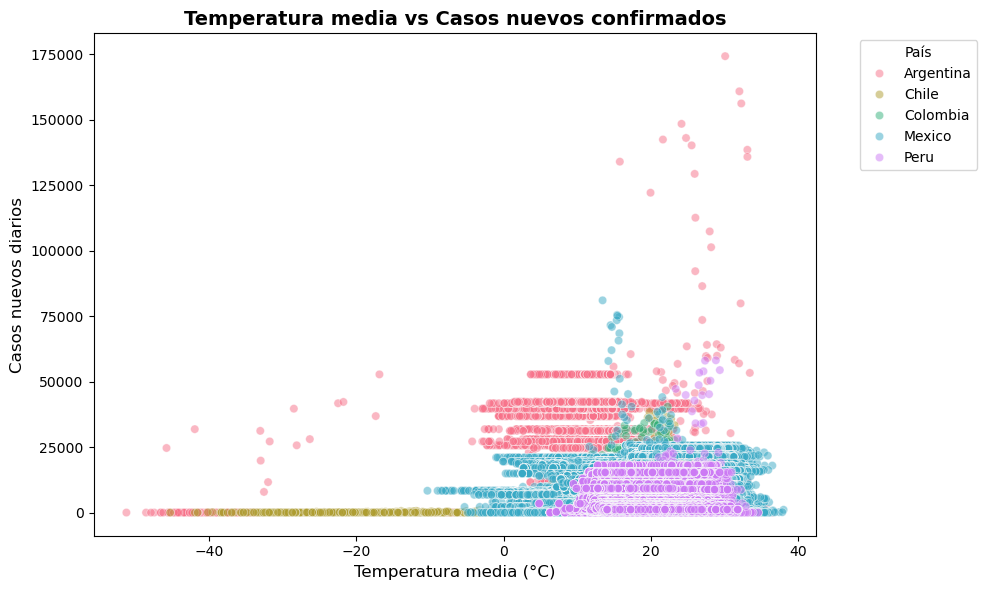

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='average_temperature_celsius', y='new_confirmed',
                hue='country_name', palette='husl', alpha=0.5)

plt.title('Temperatura media vs Casos nuevos confirmados', fontsize=14, fontweight='bold')
plt.xlabel('Temperatura media (°C)', fontsize=12)
plt.ylabel('Casos nuevos diarios', fontsize=12)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
# plt.savefig('dispersion_temp_vs_casos.png', dpi=300)
plt.show()

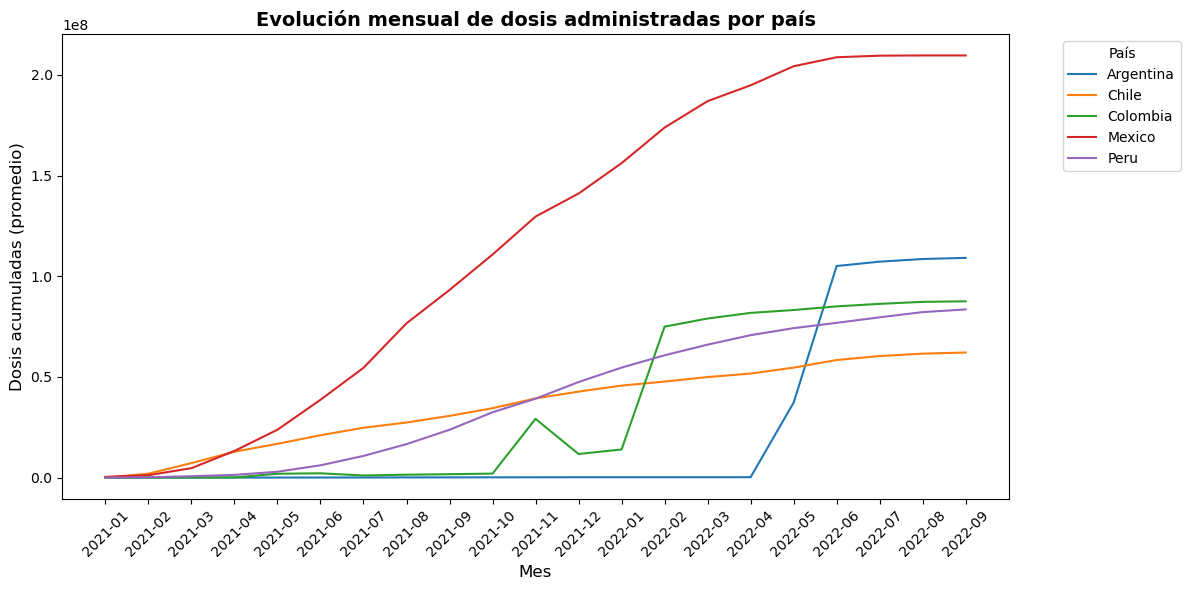

In [49]:
# Crear columna 'mes' si no existe
df['mes'] = df['date'].dt.to_period('M')

# Agrupar y convertir 'mes' a str para graficar
evolucion_vacunas = df.groupby(['country_name', 'mes'])['cumulative_vaccine_doses_administered'].mean().reset_index()
evolucion_vacunas['mes'] = evolucion_vacunas['mes'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=evolucion_vacunas, x='mes', y='cumulative_vaccine_doses_administered',
             hue='country_name', palette='tab10')

plt.title('Evolución mensual de dosis administradas por país', fontsize=14, fontweight='bold')
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Dosis acumuladas (promedio)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
# plt.savefig('evolucion_vacunas_mensual.png', dpi=300)
plt.show()

#Conclusión del Avance 2

Durante este segundo avance del Proyecto Integrador, se realizó un análisis estadístico y visual de los datos epidemiológicos y contextuales de América Latina, centrado en variables clave como la incidencia de COVID-19, las tasas de vacunación, y factores demográficos y sanitarios.

A través del uso de librerías como `pandas`, `numpy`, `matplotlib` y `seaborn`, se calcularon medidas de tendencia central, dispersión y correlaciones que permitieron comprender el comportamiento del virus en los distintos países.

Las visualizaciones personalizadas revelaron patrones significativos, como la relación entre la densidad poblacional y el número de contagios, la desigualdad en el acceso a la vacunación, y posibles vínculos entre factores climáticos y la incidencia del virus.

Estas observaciones sientan una base sólida para futuras recomendaciones estratégicas y análisis predictivos, permitiendo abordar la toma de decisiones con mayor profundidad y evidencia visual.

El avance 2 cierra con una comprensión más clara del comportamiento de la pandemia en la región, lo cual será esencial para el desarrollo del último tramo del proyecto.

#Avance 3 – Análisis Avanzado de Series Temporales

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de gráficos
sns.set(style='whitegrid')
plt.style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [51]:
ruta = '/Users/eric/Documents/PYTHON/M4 PI FILES/DatosFinalesFiltrado.csv'
df = pd.read_csv(ruta)

# Asegurar tipo de dato fecha
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [52]:
df['casos_activos'] = df['cumulative_confirmed'] - df['cumulative_deceased'] - df['cumulative_recovered']

In [53]:
df['tasa_crecimiento'] = df.groupby('country_name')['cumulative_confirmed'].pct_change() * 100

In [54]:
# Crear columna semana-año
df['semana'] = df['date'].dt.to_period('W')

In [55]:
# Promedio de casos diarios por semana
casos_semanales = df.groupby(['country_name', 'semana'])['new_confirmed'].sum().reset_index()

casos_semanales.head()

,country_name,semana,new_confirmed
0,Argentina,2020-12-28/2021-01-03,38357.0
1,Argentina,2021-01-04/2021-01-10,253899.0
2,Argentina,2021-01-11/2021-01-17,226912.0
3,Argentina,2021-01-18/2021-01-24,200356.0
4,Argentina,2021-01-25/2021-01-31,179152.0


In [56]:
colombia = df[df['country_name'] == 'Colombia']
autocorr = colombia['new_confirmed'].autocorr()
print(f"Autocorrelación de casos en Colombia: {autocorr:.2f}")

Autocorrelación de casos en Colombia: 0.99


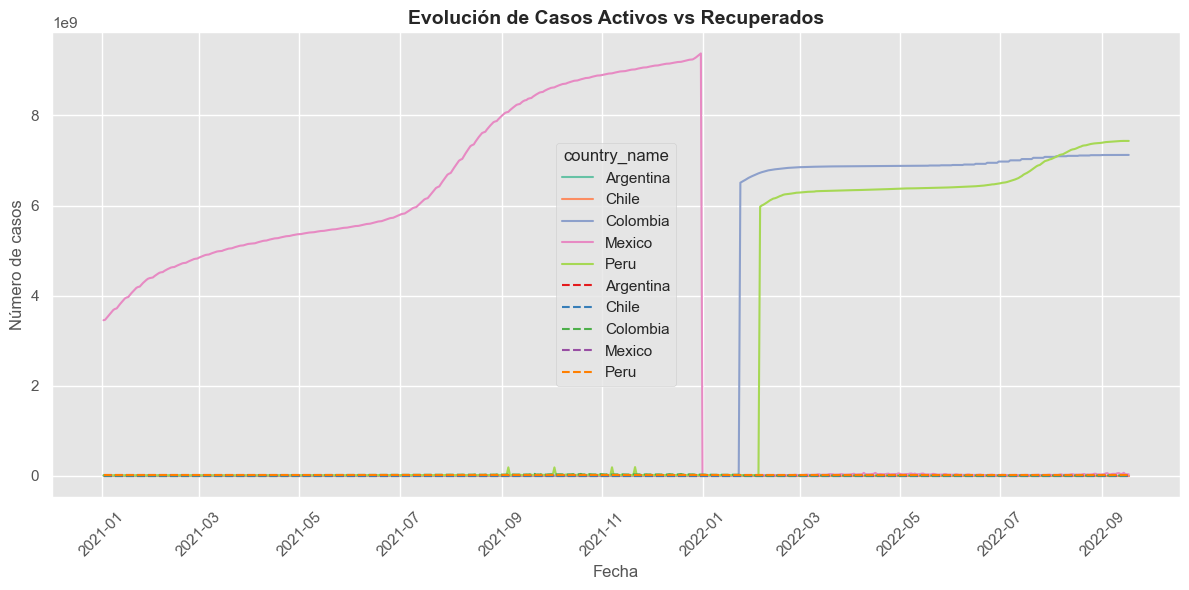

In [57]:
# Agrupar por país y fecha
evolucion_casos = df.groupby(['country_name', 'date'])[['casos_activos', 'cumulative_recovered']].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=evolucion_casos, x='date', y='casos_activos', hue='country_name', palette='Set2')
sns.lineplot(data=evolucion_casos, x='date', y='cumulative_recovered', hue='country_name', palette='Set1', linestyle='--')

plt.title('Evolución de Casos Activos vs Recuperados', fontsize=14, fontweight='bold')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

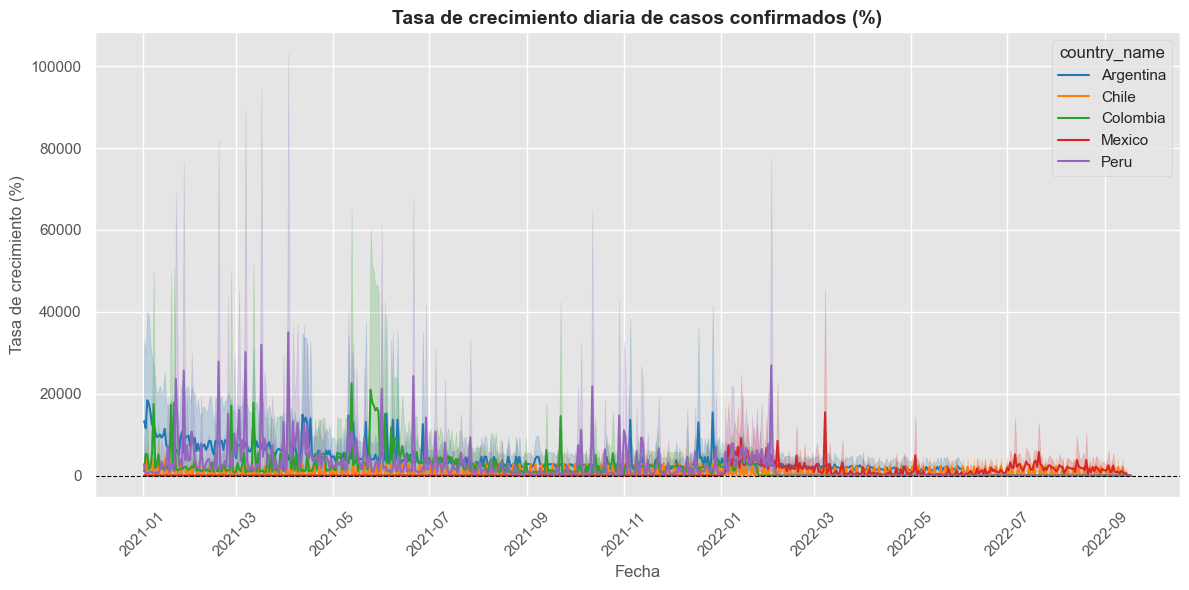

In [58]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='tasa_crecimiento', hue='country_name', palette='tab10')
plt.title('Tasa de crecimiento diaria de casos confirmados (%)', fontsize=14, fontweight='bold')
plt.xlabel('Fecha')
plt.ylabel('Tasa de crecimiento (%)')
plt.xticks(rotation=45)
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

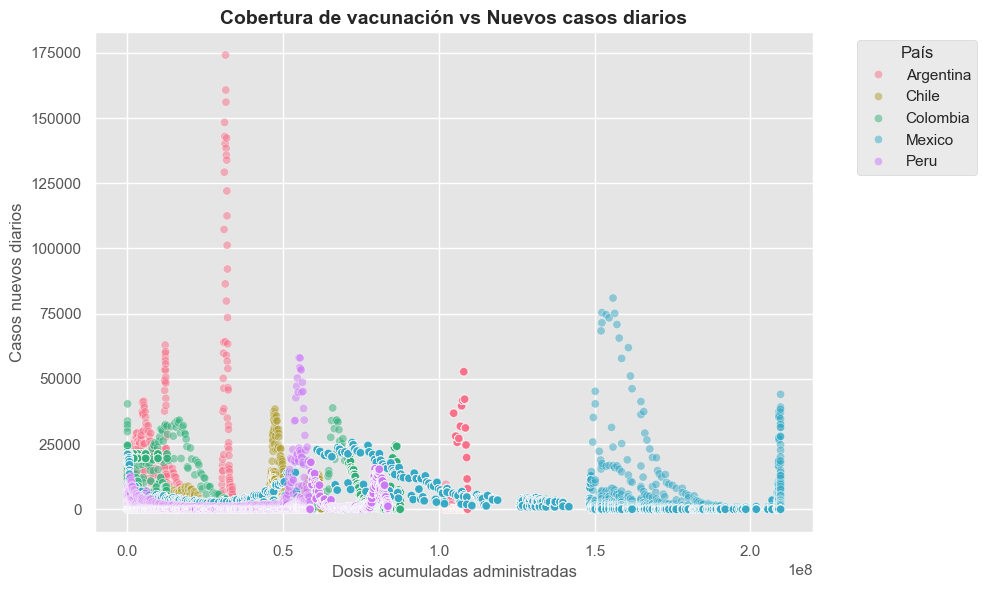

In [59]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='cumulative_vaccine_doses_administered', y='new_confirmed',
                hue='country_name', alpha=0.5, palette='husl')

plt.title('Cobertura de vacunación vs Nuevos casos diarios', fontsize=14, fontweight='bold')
plt.xlabel('Dosis acumuladas administradas')
plt.ylabel('Casos nuevos diarios')
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

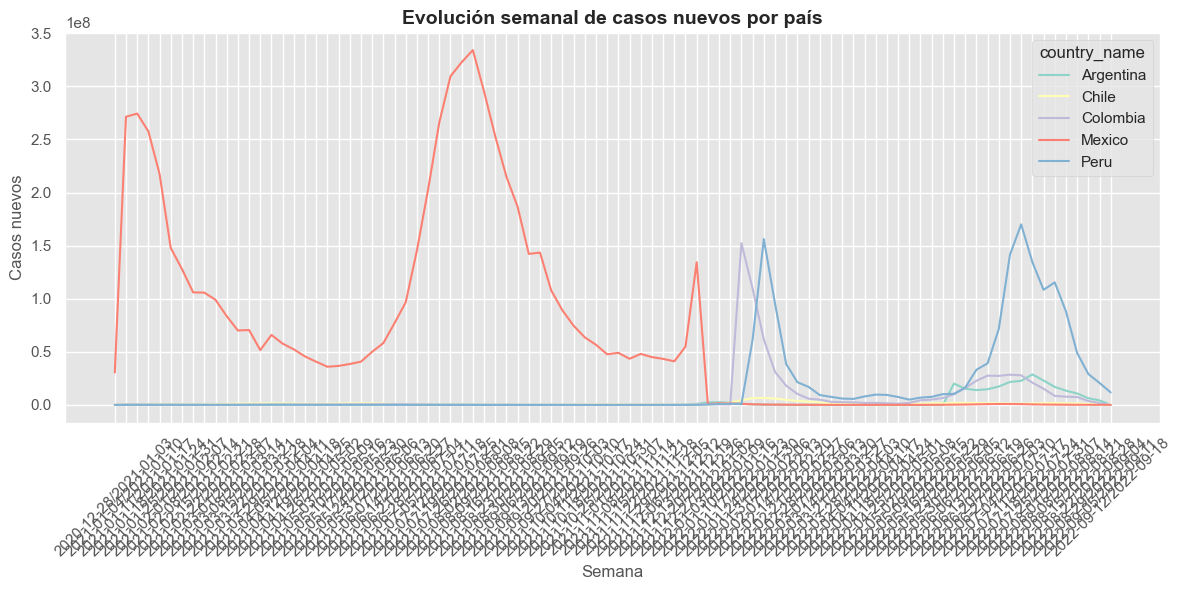

In [60]:
casos_semanales = df.groupby(['country_name', 'semana'])['new_confirmed'].sum().reset_index()
casos_semanales['semana'] = casos_semanales['semana'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=casos_semanales, x='semana', y='new_confirmed', hue='country_name', palette='Set3')
plt.title('Evolución semanal de casos nuevos por país', fontsize=14, fontweight='bold')
plt.xlabel('Semana')
plt.ylabel('Casos nuevos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [61]:
variables_clave = [
    'new_confirmed',
    'new_deceased',
    'cumulative_confirmed',
    'cumulative_deceased',
    'cumulative_vaccine_doses_administered',
    'population_density',
    'diabetes_prevalence',
    'life_expectancy',
    'nurses_per_1000',
    'gdp_per_capita_usd',
    'tasa_crecimiento'
]

corr_matrix = df[variables_clave].corr()
corr_matrix.round(2)

,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population_density,diabetes_prevalence,life_expectancy,nurses_per_1000,gdp_per_capita_usd,tasa_crecimiento
new_confirmed,1.00,0.69,0.37,0.55,-0.04,0.28,0.31,-0.27,-0.07,0.10,0.01
new_deceased,0.69,1.00,0.22,0.50,-0.15,0.43,0.46,-0.37,-0.07,0.19,0.00
cumulative_confirmed,0.37,0.22,1.00,0.75,0.13,0.09,0.02,-0.09,-0.18,-0.13,-0.00
cumulative_deceased,0.55,0.50,0.75,1.00,0.05,0.36,0.37,-0.38,-0.16,0.04,-0.01
cumulative_vaccine_doses_administered,-0.04,-0.15,0.13,0.05,1.00,0.53,0.57,-0.45,-0.08,0.23,-0.00
population_density,0.28,0.43,0.09,0.36,0.53,1.00,0.93,-0.68,-0.25,0.22,-0.01
diabetes_prevalence,0.31,0.46,0.02,0.37,0.57,0.93,1.00,-0.68,-0.03,0.49,-0.01
life_expectancy,-0.27,-0.37,-0.09,-0.38,-0.45,-0.68,-0.68,1.00,0.67,0.11,0.00
nurses_per_1000,-0.07,-0.07,-0.18,-0.16,-0.08,-0.25,-0.03,0.67,1.00,0.76,-0.00
gdp_per_capita_usd,0.10,0.19,-0.13,0.04,0.23,0.22,0.49,0.11,0.76,1.00,-0.00


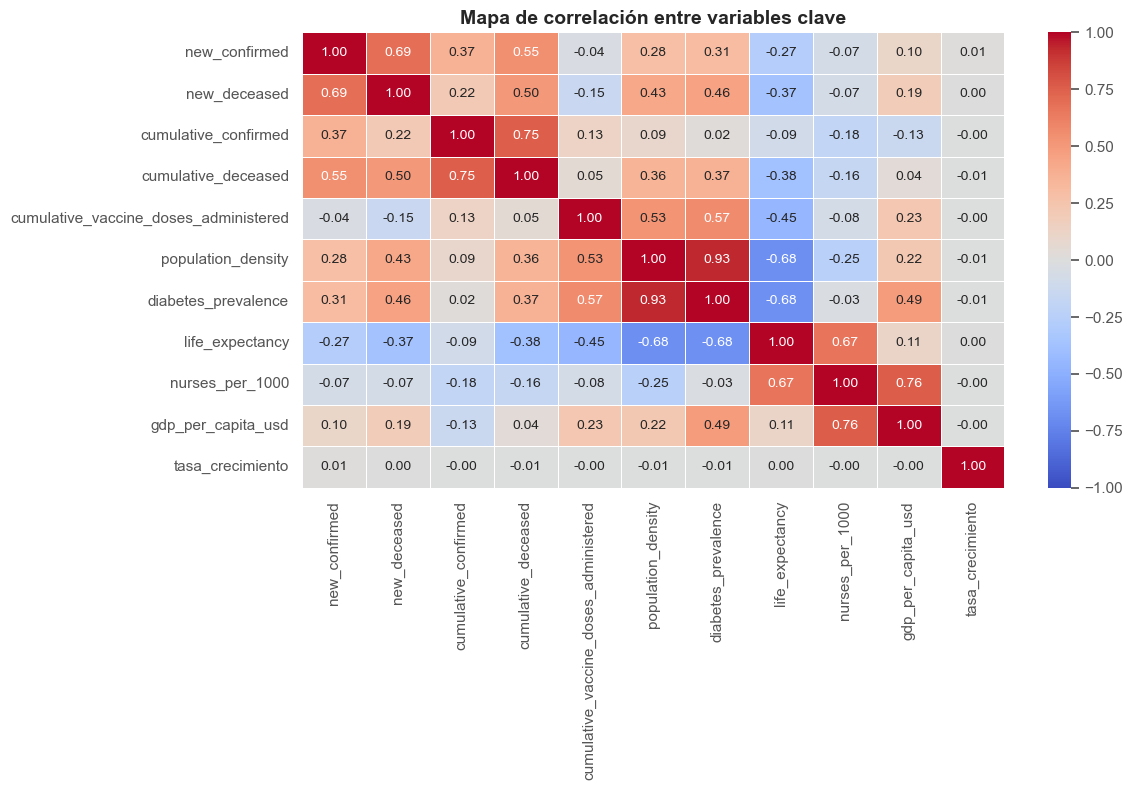

In [62]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title('Mapa de correlación entre variables clave', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [63]:
colombia = df[df['country_name'] == 'Colombia'][['new_confirmed', 'cumulative_vaccine_doses_administered']]
print("Correlación Colombia (Vacunas vs Casos nuevos):")
print(colombia.corr().iloc[0, 1])

Correlación Colombia (Vacunas vs Casos nuevos):
0.240938017496838


#Insights preliminares sobre correlaciones

- **Correlaciones positivas fuertes (> 0.7)**: Variables que aumentan juntas, por ejemplo, `cumulative_confirmed` y `cumulative_deceased`, lo que es esperado al avanzar la pandemia.
- **Correlaciones negativas (< -0.3)**: Posible efecto de la vacunación en la reducción de casos (`cumulative_vaccine_doses_administered` vs `new_confirmed`), aunque puede variar según país.
- **Correlaciones débiles**: Factores como `gdp_per_capita_usd` o `nurses_per_1000` muestran baja relación directa con nuevos casos, lo que sugiere que no son los principales determinantes en la incidencia diaria.
- Estas relaciones ayudan a priorizar variables para futuras predicciones y decisiones estratégicas.

In [64]:
def analizar_tendencia(pais):
    """
    Muestra evolución de casos confirmados y tasa de crecimiento para un país específico.
    """
    data = df[df['country_name'] == pais].copy()
    
    fig, ax1 = plt.subplots(figsize=(12,5))

    color = 'tab:blue'
    ax1.set_xlabel('Fecha')
    ax1.set_ylabel('Casos nuevos diarios', color=color)
    ax1.plot(data['date'], data['new_confirmed'], color=color, label='Casos nuevos')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # Eje secundario
    color = 'tab:red'
    ax2.set_ylabel('Tasa de crecimiento (%)', color=color)
    ax2.plot(data['date'], data['tasa_crecimiento'], color=color, linestyle='--', label='Tasa crecimiento')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.suptitle(f'Evolución COVID-19 en {pais}', fontsize=14, fontweight='bold')
    fig.tight_layout()
    plt.show()

In [65]:
def correlacion_vacunas_casos(pais):
    """
    Calcula correlación entre vacunación y casos nuevos diarios para un país.
    """
    data = df[df['country_name'] == pais]
    corr = data['new_confirmed'].corr(data['cumulative_vaccine_doses_administered'])
    print(f"Correlación en {pais} (Vacunas vs Casos nuevos): {corr:.2f}")

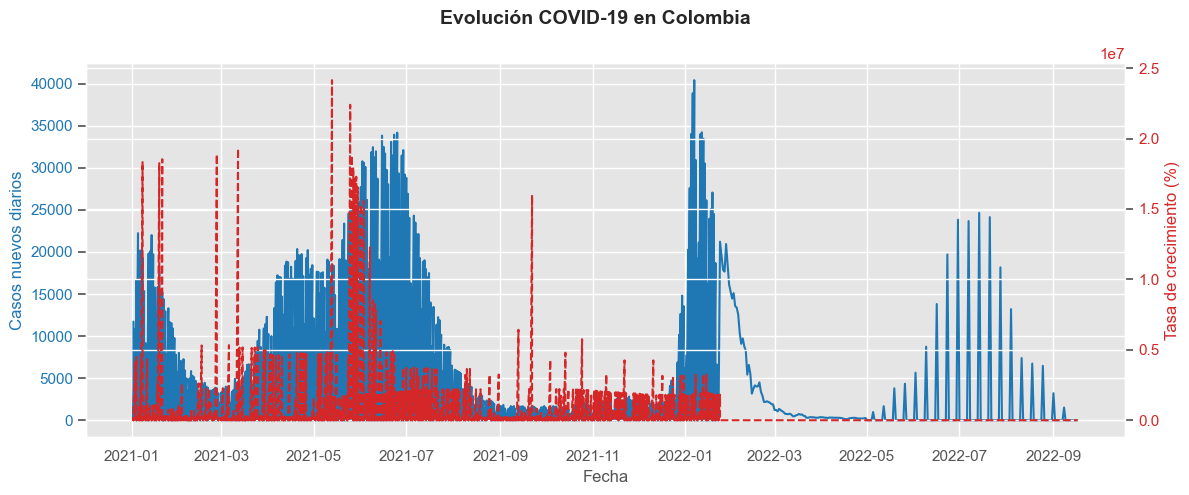

Correlación en Colombia (Vacunas vs Casos nuevos): 0.24


In [67]:
#EJEMPLOS DE USO
analizar_tendencia('Colombia')
correlacion_vacunas_casos('Colombia')

#Conclusión del Avance 3

En este avance se aplicaron técnicas de análisis temporal y correlacional avanzadas para comprender la evolución de la pandemia en distintos países de América Latina.  
Se añadieron métricas complementarias como **casos activos** y **tasa de crecimiento diaria**, además de visualizar la evolución semanal y la relación entre vacunación y reducción de casos.

El análisis de correlaciones permitió identificar variables con relaciones fuertes y débiles, contribuyendo a entender mejor los factores que influyen en el comportamiento de la pandemia.

Finalmente, se desarrollaron funciones personalizadas que permiten automatizar el análisis por país y evaluar rápidamente tendencias y relaciones clave, optimizando la eficiencia del estudio y dejando la base lista para etapas predictivas futuras.

In [3]:
# 1. Crear métricas adicionales (si no existen)
if 'casos_activos' not in df.columns:
    df['casos_activos'] = df['cumulative_confirmed'] - df['cumulative_deceased'] - df['cumulative_recovered']

if 'tasa_crecimiento' not in df.columns:
    df['tasa_crecimiento'] = df.groupby('country_name')['cumulative_confirmed'].pct_change() * 100

if 'semana' not in df.columns:
    df['semana'] = pd.to_datetime(df['date'], errors='coerce').dt.to_period('W')

# 2. Guardar CSV actualizado
df.to_csv('/Users/eric/Documents/PYTHON/M4 PI FILES/DatosFinalesFiltrado.csv', index=False)
print("✅ Archivo actualizado correctamente con las métricas del Avance 3.")

✅ Archivo actualizado correctamente con las métricas del Avance 3.


In [5]:
# Recalcular casos activos
df['casos_activos'] = df['cumulative_confirmed'] - df['cumulative_deceased'] - df['cumulative_recovered']

# Si hay nulos, reemplazarlos por 0
df['casos_activos'] = df['casos_activos'].fillna(0)

# Guardar nuevamente el CSV
df.to_csv('/Users/eric/Documents/PYTHON/M4 PI FILES/DatosFinalesFiltrado.csv', index=False)
print("✅ Casos activos recalculados y guardados correctamente")

✅ Casos activos recalculados y guardados correctamente


In [6]:
# 1️⃣ Recalcular tasa de crecimiento (%)
df['tasa_crecimiento'] = df.groupby('country_name')['cumulative_confirmed'].pct_change() * 100

# Reemplazar nulos por 0
df['tasa_crecimiento'] = df['tasa_crecimiento'].fillna(0)

# Limitar valores extremos para Power BI
df['tasa_crecimiento'] = df['tasa_crecimiento'].clip(lower=-100, upper=300)

# Guardar CSV actualizado
df.to_csv('/Users/eric/Documents/PYTHON/M4 PI FILES/DatosFinalesFiltrado.csv', index=False)
print("✅ Tasa de crecimiento recalculada y CSV actualizado correctamente.")

✅ Tasa de crecimiento recalculada y CSV actualizado correctamente.


In [7]:
df['casos_activos'] = df['cumulative_confirmed'] - df['cumulative_deceased']

# Si hay datos de recuperados, restarlos; si no, dejar solo confirmados - fallecidos
if 'cumulative_recovered' in df.columns:
    df['casos_activos'] = df['casos_activos'] - df['cumulative_recovered'].fillna(0)

# Evitar negativos
df['casos_activos'] = df['casos_activos'].clip(lower=0)

In [8]:
# Guardar CSV actualizado con casos_activos corregidos
df.to_csv('/Users/eric/Documents/PYTHON/M4 PI FILES/DatosFinalesFiltrado.csv', index=False)

print("✅ Archivo guardado correctamente con casos_activos corregidos.")

✅ Archivo guardado correctamente con casos_activos corregidos.


In [9]:
import pandas as pd

# Cargar archivo
ruta = '/Users/eric/Documents/PYTHON/M4 PI FILES/DatosFinalesFiltrado.csv'
df = pd.read_csv(ruta)

# ────────────── 1️⃣ Calcular CASOS ACTIVOS por país y fecha ──────────────
df['casos_activos'] = df.groupby(['country_name', 'date']).apply(
    lambda x: (x['cumulative_confirmed'] - x['cumulative_deceased'] - x['cumulative_recovered'].fillna(0)).max()
).reset_index(level=[0,1], drop=True)

df['casos_activos'] = df['casos_activos'].fillna(0).clip(lower=0)

# ────────────── 2️⃣ Calcular TASA DE CRECIMIENTO limpia ──────────────
df['tasa_crecimiento'] = df.groupby('country_name')['cumulative_confirmed'].pct_change() * 100
df['tasa_crecimiento'] = df['tasa_crecimiento'].fillna(0).clip(lower=-100, upper=300)

# ────────────── 3️⃣ Mantener solo columnas clave (para aligerar archivo) ──────────────
columnas_utiles = [
    'date','country_name','new_confirmed','new_deceased',
    'cumulative_confirmed','cumulative_deceased','cumulative_vaccine_doses_administered',
    'population','life_expectancy','diabetes_prevalence',
    'casos_activos','tasa_crecimiento'
]
df = df[columnas_utiles]

# ────────────── 4️⃣ Convertir fecha a formato correcto ──────────────
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# ────────────── 5️⃣ Eliminar filas duplicadas y con todos los valores nulos ──────────────
df = df.drop_duplicates()
df = df.dropna(how='all')

# ────────────── 6️⃣ Guardar CSV optimizado ──────────────
ruta_final = '/Users/eric/Documents/PYTHON/M4 PI FILES/DatosFinalesFiltrado.csv'
df.to_csv(ruta_final, index=False)

print("✅ CSV optimizado y guardado correctamente.")
print("Filas finales:", len(df), " | Columnas finales:", len(df.columns))

/var/folders/85/4zhdkjw164d3851rbf4mvshh0000gn/T/ipykernel_1130/2689973780.py:8: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df['casos_activos'] = df.groupby(['country_name', 'date']).apply(


✅ CSV optimizado y guardado correctamente.
Filas finales: 3757919  | Columnas finales: 12


In [11]:
import pandas as pd

# Cargar dataset
ruta = '/Users/eric/Documents/PYTHON/M4 PI FILES/DatosFinalesFiltrado.csv'
df = pd.read_csv(ruta)

# Asegurar formato de fecha
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Ordenar datos
df = df.sort_values(by=['country_name', 'date'])

# 1️⃣ Calcular CASOS ACTIVOS (usa recovered si existe)
if 'cumulative_recovered' in df.columns:
    df['casos_activos'] = (
        df['cumulative_confirmed'].fillna(0) -
        df['cumulative_deceased'].fillna(0) -
        df['cumulative_recovered'].fillna(0)
    )
else:
    df['casos_activos'] = (
        df['cumulative_confirmed'].fillna(0) -
        df['cumulative_deceased'].fillna(0)
    )

df['casos_activos'] = df['casos_activos'].clip(lower=0)

# 2️⃣ Calcular TASA DE CRECIMIENTO diaria (%)
df['tasa_crecimiento'] = df.groupby('country_name')['cumulative_confirmed'].pct_change() * 100
df['tasa_crecimiento'] = df['tasa_crecimiento'].replace([float('inf'), -float('inf')], 0).fillna(0)

# 3️⃣ Verificar primeras filas
print(df[['country_name', 'date', 'casos_activos', 'tasa_crecimiento']].head(20))

# 4️⃣ Guardar CSV actualizado
df.to_csv(ruta, index=False)
print("✅ Archivo actualizado correctamente con métricas recalculadas.")

   country_name       date  casos_activos  tasa_crecimiento
0     Argentina 2021-01-02      1623946.0          0.000000
1     Argentina 2021-01-02        21198.0        -98.661167
2     Argentina 2021-01-02          677.0        -96.870389
3     Argentina 2021-01-02          677.0          0.000000
4     Argentina 2021-01-02          569.0        -15.857143
5     Argentina 2021-01-02        10167.0       1723.089983
6     Argentina 2021-01-02          949.0        -90.854908
7     Argentina 2021-01-02          949.0          0.000000
8     Argentina 2021-01-02         1102.0         21.384929
9     Argentina 2021-01-02         2025.0         78.020134
10    Argentina 2021-01-02         2025.0          0.000000
11    Argentina 2021-01-02          236.0        -88.548539
12    Argentina 2021-01-02          210.0         -8.230453
13    Argentina 2021-01-02          210.0          0.000000
14    Argentina 2021-01-02          524.0        139.013453
15    Argentina 2021-01-02           65.

In [13]:
import pandas as pd

# ------------------------------
# 1️⃣ Cargar datos
# ------------------------------
ruta = '/Users/eric/Documents/PYTHON/M4 PI FILES/DatosFinalesFiltrado.csv'
df = pd.read_csv(ruta)

# Asegurar formato de fecha
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# ------------------------------
# 2️⃣ Agrupar datos y eliminar duplicados
# ------------------------------
cols_numericas = df.select_dtypes(include=['float64', 'int64']).columns
df_agg = df.groupby(['country_name', 'date'])[cols_numericas].sum().reset_index()

# ------------------------------
# 3️⃣ Verificar si existe 'cumulative_recovered'
# ------------------------------
if 'cumulative_recovered' not in df_agg.columns:
    df_agg['cumulative_recovered'] = 0  # Asumir cero si no hay datos

# ------------------------------
# 4️⃣ Calcular casos activos
# ------------------------------
df_agg['casos_activos'] = (
    df_agg['cumulative_confirmed'].fillna(0) -
    df_agg['cumulative_deceased'].fillna(0) -
    df_agg['cumulative_recovered'].fillna(0)
).clip(lower=0)

# ------------------------------
# 5️⃣ Calcular tasa de crecimiento diaria (%)
# ------------------------------
df_agg = df_agg.sort_values(by=['country_name', 'date'])
df_agg['tasa_crecimiento'] = (
    df_agg.groupby('country_name')['cumulative_confirmed']
    .pct_change()
    .replace([float('inf'), -float('inf')], 0)
    .fillna(0) * 100
)

# ------------------------------
# 6️⃣ Vista previa para validar
# ------------------------------
print("Registros por país:", df_agg.groupby('country_name').size())
print("\nVista previa:")
print(df_agg[['country_name', 'date', 'cumulative_confirmed',
              'casos_activos', 'tasa_crecimiento']].head(40))

# ------------------------------
# 7️⃣ Guardar archivo limpio
# ------------------------------
ruta_salida = '/Users/eric/Documents/PYTHON/M4 PI FILES/DatosFinalesFiltrado.csv'
df_agg.to_csv(ruta_salida, index=False)
print("✅ Archivo limpio y consolidado guardado correctamente.")

Registros por país: country_name
Argentina    624
Chile        624
Colombia     624
Mexico       624
Peru         624
dtype: int64

Vista previa:
   country_name       date  cumulative_confirmed  casos_activos  \
0     Argentina 2021-01-02             5006996.0      4866527.0   
1     Argentina 2021-01-03             5116096.0      4973959.0   
2     Argentina 2021-01-04             5020564.0      4881633.0   
3     Argentina 2021-01-05             5035772.0      4897520.0   
4     Argentina 2021-01-06             5083914.0      4944888.0   
5     Argentina 2021-01-07             5171367.0      5030831.0   
6     Argentina 2021-01-08             5157626.0      5017945.0   
7     Argentina 2021-01-09             5192760.0      5052210.0   
8     Argentina 2021-01-10             5373386.0      5228434.0   
9     Argentina 2021-01-11             5252655.0      5111394.0   
10    Argentina 2021-01-12             5277573.0      5136085.0   
11    Argentina 2021-01-13             5325570.0  